In [43]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

In [44]:
diamonds = pd.read_csv("../Data/Diamonds Prices2022.csv")

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Fitting a Regression in sklearn

In [40]:
from sklearn.linear_model import LinearRegression

X = diamonds[["carat"]]
y = diamonds["price"]

lr = LinearRegression().fit(X, y)
# we can use LinearRegression(fit_intercept=False).fit(X, y)   

print(f"Intercept: {lr.intercept_}")
print(f"Coefficients: {lr.coef_}")


Intercept: -2256.395047537996
Coefficients: [7756.43615951]


### Fitting a Regression in Statsmodels

In [45]:
X = sm.add_constant(diamonds["carat"])
y = diamonds["price"]

model = sm.OLS(y, X).fit()
model.summary()
# we can call .summery() directely afetr 'sm.OLS(y, X).fit().summery()'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:33:35   Log-Likelihood:            -4.7276e+05
No. Observations:               53943   AIC:                         9.455e+05
Df Residuals:                   53941   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3950     13.055   -172.840      0.000   -2281.983   -2230.807
carat       7756.4362     14.066    551.423      0.000    7728.866    7784.006
==============================================================================
Omnibus:                    14027.005   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153060.389
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.036   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X 
# X is always conastant = 1

,const,carat
0,1.0,0.23
1,1.0,0.21
2,1.0,0.23
3,1.0,0.29
4,1.0,0.31
...,...,...
53938,1.0,0.86
53939,1.0,0.75
53940,1.0,0.71
53941,1.0,0.71


In [52]:
# Second option for statstsmodel
X = diamonds[["carat"]]
y = diamonds["price"]
model = sm.OLS(y, X).fit()
model.summary()
# when we see R-squared (uncentered):	that means we have to add : sm.add_conatnt(x) as in : X = sm.add_constant(diamonds["carat"])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          4.004e+05
Date:                Wed, 29 Oct 2025   Prob (F-statistic):                        0.00
Time:                        15:35:22   Log-Likelihood:                     -4.8464e+05
No. Observations:               53943   AIC:                                  9.693e+05
Df Residuals:                   53942   BIC:                                  9.693e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       5666.2131      8.955    632.764      0.000    5648.662    5683.764
==============================================================================
Omnibus:                    26112.003   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146451.869
Skew:                           2.340   Prob(JB):                         0.00
Kurtosis:                       9.577   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X
# X is not constant

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31
...,...
53938,0.86
53939,0.75
53940,0.71
53941,0.71


### Making Predictions

In [54]:
model.predict([1, 2])

array([ 5666.21312432, 11332.42624864])

In [55]:
new_diamonds = pd.DataFrame({"carat": [0, .1, .3, .5, 1, 2, 3, 5]})

In [57]:
model.predict(new_diamonds)

0        0.000000
1      566.621312
2     1699.863937
3     2833.106562
4     5666.213124
5    11332.426249
6    16998.639373
7    28331.065622
dtype: float64

In [58]:
!git add 02_Regression.ipynb
!git commit -m "Regression-Fitting a Regression"
!git push origin master


[master ab6fd27] Regression-Fitting a Regression
 1 file changed, 943 insertions(+)
 create mode 100644 DataScienceinPythonRegression-230823-154628/Course Materials/Demo Notebooks/02_Regression.ipynb
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 22 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 92.99 KiB | 1023.00 KiB/s, done.
Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:Proftg/Maven-regression.git
   6e94b4c..ab6fd27  master -> master


### Residual Plot

<Axes: ylabel='None'>

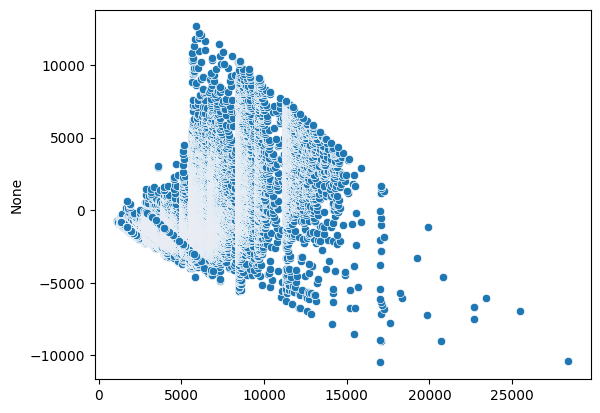

In [59]:
import seaborn as sns

sns.scatterplot(x=model.predict(), y=model.resid)

In [60]:
!git add 02_Regression.ipynb
!git commit -m "Residual Plot"
!git push origin master


[master 03a7189] Residual Plot
 1 file changed, 32 insertions(+), 6 deletions(-)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 22 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 1.02 KiB | 1.02 MiB/s, done.
Total 6 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:Proftg/Maven-regression.git
   ab6fd27..03a7189  master -> master
